In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

  BiocManager::install("phyloseq") # Install phyloseq

  install.packages(c("RColorBrewer", "patchwork"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'phyloseq'

also installing the dependencies ‘bitops’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘pixmap’, ‘sp’, ‘Rcpp’, ‘RcppArmadillo’, ‘rhdf5’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘GenomeInfoDb’, ‘iterators’, ‘permute’, ‘ade4’, ‘ape’, ‘Biobase’, ‘BiocGenerics’, ‘biomformat’, ‘Biostrings’, ‘foreach’, ‘igraph’, ‘multtest’, ‘plyr’, ‘reshape2’, ‘vegan’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'gargle', 'highr',
  'isoband', 'knitr', 'openssl', 'ragg', 'roxygen2', 'textshaping', 'utf8',
  'whisker', 'withr', 'boot'

Installing packages into ‘/usr/local/lib/R/site-library’
(

In [ ]:
library("phyloseq")
library("ggplot2")
library("RColorBrewer")
library("patchwork")
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
tax = 'Class'

In [ ]:
merged_metagenomes <- import_biom("latinbiota_bracken.biom")

In [ ]:
merged_metagenomes@tax_table@.Data <- substring(merged_metagenomes@tax_table@.Data, 4)
colnames(merged_metagenomes@tax_table@.Data)<- c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")

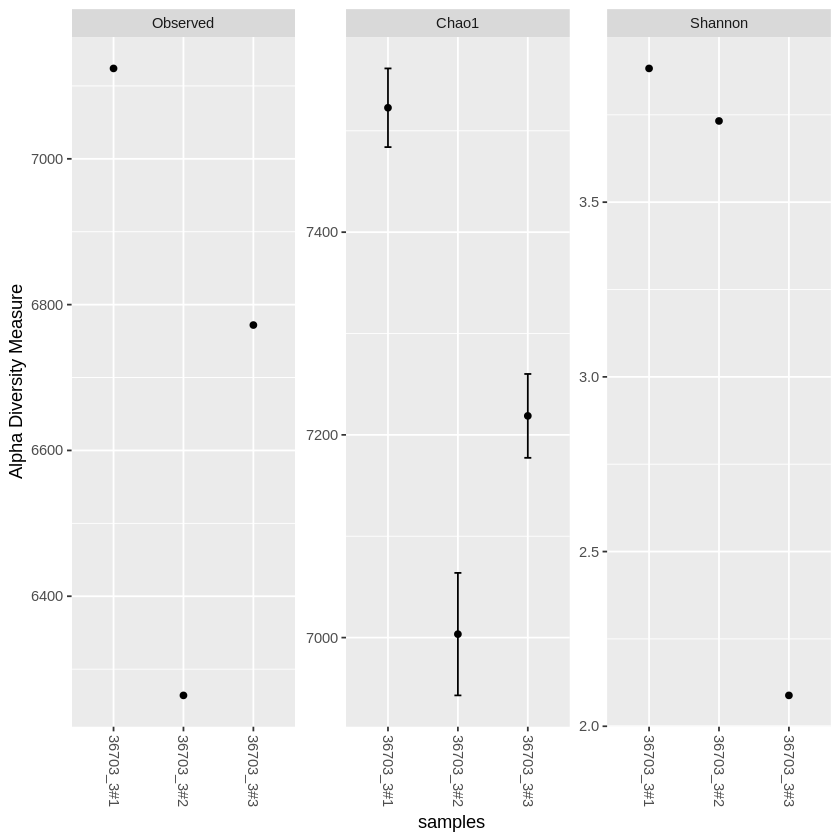

In [ ]:
merged_metagenomes <- subset_taxa(merged_metagenomes, Kingdom == "Bacteria")
plot_richness(physeq = merged_metagenomes, measures = c("Observed","Chao1","Shannon"))

In [ ]:
merged_metagenomes <- subset_taxa(merged_metagenomes, Class != "")
percentages <- transform_sample_counts(merged_metagenomes, function(x) x*100 / sum(x) )

In [ ]:
percentages_glom <- tax_glom(percentages, taxrank = tax)
percentages_df <- psmelt(percentages_glom)
absolute_glom <- tax_glom(physeq = merged_metagenomes, taxrank = tax)
absolute_df <- psmelt(absolute_glom)


In [ ]:
get_most_abundant <- function(df, num, tax_rank)
{

    df_aux <- df[, c("Class", "Abundance")]
    df_aux <- df_aux %>%
        group_by(!!sym(tax_rank)) %>%
            summarize(Total_Abundance = sum(Abundance)) %>% arrange(desc(Total_Abundance))

    most_abundant <- head(df_aux, n = num)

    filtered_df <- df[df[[tax_rank]] %in% most_abundant[[tax_rank]], ]
    unfiltered_df <- df[!(df[[tax_rank]] %in% most_abundant[[tax_rank]]), ]

    df_aux3 <- unfiltered_df[, c("Sample", "Abundance")]
    df_aux4 <- df_aux3 %>%
        group_by(Sample) %>%
        summarize(Total_Abundance = sum(Abundance)) %>% arrange(desc(Total_Abundance))

    for (sample in df_aux4$Sample)
    {
        new_row <- data.frame(OTU = 0,Sample = sample,Abundance = df_aux4$Total_Abundance[df_aux4$Sample == sample],Id = sample)
        num_cols <- ncol(filtered_df)

        if (num_cols > 4)
        {
            new_row <- cbind(new_row, matrix('Other', nrow = 1, ncol = num_cols - 4))
        }

        colnames(new_row) <- colnames(filtered_df)
        filtered_final <- rbind(filtered_df, new_row)
    }

    return (filtered_final)

}



In [ ]:
filtered_df <- get_most_abundant(percentages_df, 12, tax)
filtered_abs_df <- get_most_abundant(absolute_df, 12, tax)

In [ ]:
Phylum_colors_abs<- colorRampPalette(rainbow(8)) (length(unique(filtered_abs_df$Class)))
absolute_plot <- ggplot(data= filtered_abs_df, aes(x=Sample, y=Abundance, fill=Class))+
  geom_bar(aes(), stat="identity", position="stack")+
  scale_fill_manual(values = Phylum_colors_abs)

#percentages_df$Genus <- as.factor(percentages_df$Genus)
Phylum_colors_rel<- colorRampPalette(rainbow(8)) (length(unique(filtered_df$Class)))
relative_plot <- ggplot(data=filtered_df, aes(x=Sample, y=Abundance, fill=Class))+ geom_bar(aes(), stat="identity", position="stack")+scale_fill_manual(values = Phylum_colors_rel)
#  absolute_plot | relative_plot


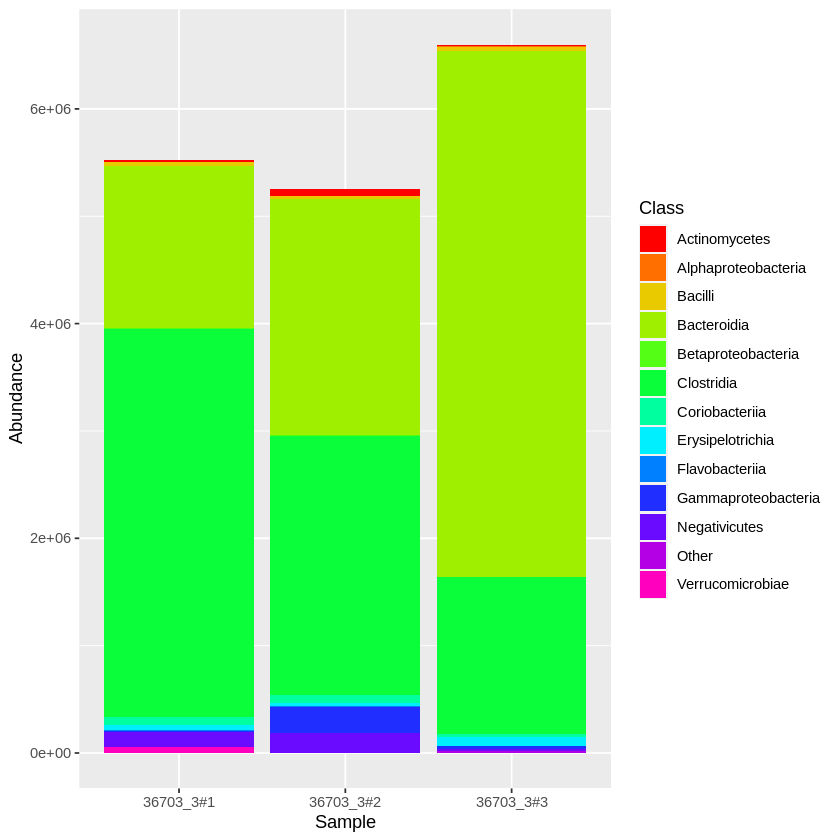

In [ ]:
absolute_plot


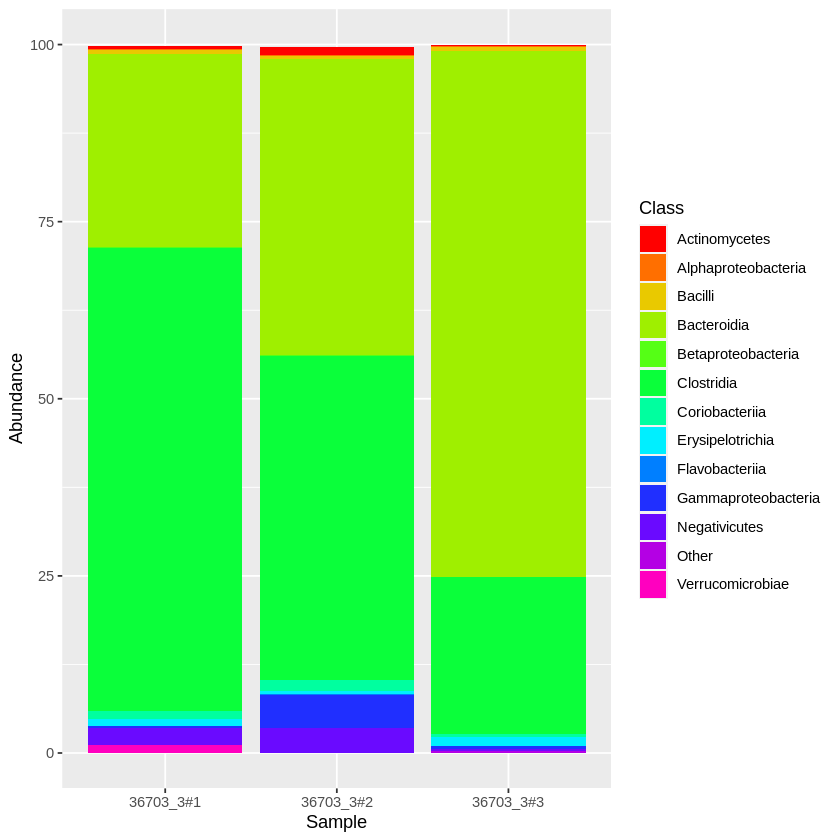

In [ ]:
relative_plot

In [ ]:
tax

[1] "Class"

In [ ]:
aux_so <- get_most_abundant(percentages_df, 12, tax)

In [ ]:
aux_so

,OTU,Sample,Abundance,Id,Kingdom,Phylum,Class
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
54,165179,36703_3#3,74.1415582,36703_3#3,Bacteria,Bacteroidota,Bacteroidia
280,853,36703_3#1,65.3567358,36703_3#1,Bacteria,Bacillota,Clostridia
281,853,36703_3#2,45.8431690,36703_3#2,Bacteria,Bacillota,Clostridia
53,165179,36703_3#2,41.7256047,36703_3#2,Bacteria,Bacteroidota,Bacteroidia
52,165179,36703_3#1,27.2451595,36703_3#1,Bacteria,Bacteroidota,Bacteroidia
282,853,36703_3#3,22.0804311,36703_3#3,Bacteria,Bacillota,Clostridia
245,562,36703_3#2,4.6579963,36703_3#2,Bacteria,Pseudomonadota,Gammaproteobacteria
209,33025,36703_3#2,3.5361477,36703_3#2,Bacteria,Bacillota,Negativicutes
208,33025,36703_3#1,2.3898943,36703_3#1,Bacteria,Bacillota,Negativicutes


In [ ]:
setwd("C:/Users/rafap/Documents/metagenomica/latin-biota/")

library("phyloseq")
library("ggplot2")
library("RColorBrewer")
library("patchwork")
library(dplyr)

merged_metagenomes <- import_biom("latinbiota_bracken.biom")
#View(merged_metagenomes@tax_table@.Data)

merged_metagenomes@tax_table@.Data <- substring(merged_metagenomes@tax_table@.Data, 4)
colnames(merged_metagenomes@tax_table@.Data)<- c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")

unique(merged_metagenomes@tax_table@.Data[,"Phylum"])

merged_metagenomes <- subset_taxa(merged_metagenomes, Kingdom == "Bacteria")
sample_sums(merged_metagenomes)
plot_richness(physeq = merged_metagenomes, measures = c("Observed","Chao1","Shannon"))

summary(merged_metagenomes@tax_table@.Data== "")
merged_metagenomes <- subset_taxa(merged_metagenomes, Class != "")
summary(merged_metagenomes@tax_table@.Data== "")

percentages <- transform_sample_counts(merged_metagenomes, function(x) x*100 / sum(x) )
head(percentages@otu_table@.Data)

percentages_glom <- tax_glom(percentages, taxrank = 'Class')
percentages_df <- psmelt(percentages_glom)
absolute_glom <- tax_glom(physeq = merged_metagenomes, taxrank = 'Class')
absolute_df <- psmelt(absolute_glom)

head(percentages_df)
head(absolute_df)

#absolute_df$Genus <- as.factor(absolute_df$Genus)
percentages_df_aux <- percentages_df[, c("Class", "Abundance")]
percentages_df_aux2 <- percentages_df_aux %>%
  group_by(Class) %>%
  summarize(Total_Abundance = sum(Abundance)) %>% arrange(desc(Total_Abundance))

absolute_df_aux <- absolute_df[, c("Class", "Abundance")]
absolute_df_aux2 <- absolute_df_aux %>%
  group_by(Class) %>%
  summarize(Total_Abundance = sum(Abundance)) %>% arrange(desc(Total_Abundance))



#absolute_aux <- absolute_df %>% group_by('Genus')
most_abundant <- head(percentages_df_aux2, n = 12)
most_abundant_abs <- head(absolute_df_aux2, n = 12)

filtered_df <- percentages_df[percentages_df$Class %in% most_abundant$Class, ]
unfiltered_df <- percentages_df[!(percentages_df$Class %in% most_abundant$Class), ]
filtered_abs_df <- absolute_df[absolute_df$Class %in% most_abundant_abs$Class, ]
unfiltered_abs_df <- absolute_df[!(absolute_df$Class %in% most_abundant_abs$Class), ]

percentages_df_aux3 <- unfiltered_df[, c("Sample", "Abundance")]
percentages_df_aux4 <- percentages_df_aux3 %>%
  group_by(Sample) %>%
  summarize(Total_Abundance = sum(Abundance)) %>% arrange(desc(Total_Abundance))
absolute_df_aux3 <- unfiltered_abs_df[, c("Sample", "Abundance")]
absolute_df_aux4 <- absolute_df_aux3 %>%
  group_by(Sample) %>%
  summarize(Total_Abundance = sum(Abundance)) %>% arrange(desc(Total_Abundance))

new_row <- data.frame(
  OTU = 0,
  Sample = '36703_3#1',
  Abundance = percentages_df_aux4$Total_Abundance[percentages_df_aux4$Sample == '36703_3#1'],
  Id = '36703_3#1',
  Kindom = 'Not Specified',
  Phylum = 'Not Specified',
  Class = 'Other'
)
new_row2 <- data.frame(
  OTU = 0,
  Sample = '36703_3#2',
  Abundance = percentages_df_aux4$Total_Abundance[percentages_df_aux4$Sample == '36703_3#2'],
  Id = '36703_3#2',
  Kindom = 'Not Specified',
  Phylum = 'Not Specified',
  Class = 'Other'
)
new_row3 <- data.frame(
  OTU = 0,
  Sample = '36703_3#3',
  Abundance = percentages_df_aux4$Total_Abundance[percentages_df_aux4$Sample == '36703_3#3'],
  Id = '36703_3#3',
  Kindom = 'Not Specified',
  Phylum = 'Not Specified',
  Class = 'Not Specified',
  Order = 'Other'
)
colnames(new_row) <- colnames(filtered_df)
colnames(new_row2) <- colnames(filtered_df)
colnames(new_row3) <- colnames(filtered_df)
filtered_df2 <- rbind(filtered_df, new_row)
filtered_df2 <- rbind(filtered_df2, new_row2)
filtered_df2 <- rbind(filtered_df2, new_row3)


new_row <- data.frame(
  OTU = 0,
  Sample = '36703_3#1',
  Abundance = absolute_df_aux4$Total_Abundance[absolute_df_aux4$Sample == '36703_3#1'],
  Id = '36703_3#1',
  Kindom = 'Not Specified',
  Phylum = 'Not Specified',
  Class = 'Other'
)

new_row2 <- data.frame(
  OTU = 0,
  Sample = '36703_3#2',
  Abundance = absolute_df_aux4$Total_Abundance[absolute_df_aux4$Sample == '36703_3#2'],
  Id = '36703_3#2',
  Kindom = 'Not Specified',
  Phylum = 'Not Specified',
  Class = 'Other'
)
new_row3 <- data.frame(
  OTU = 0,
  Sample = '36703_3#3',
  Abundance = absolute_df_aux4$Total_Abundance[absolute_df_aux4$Sample == '36703_3#3'],
  Id = '36703_3#3',
  Kindom = 'Not Specified',
  Phylum = 'Not Specified',
  Class = 'Other'
)
colnames(new_row) <- colnames(filtered_abs_df)
colnames(new_row2) <- colnames(filtered_abs_df)
colnames(new_row3) <- colnames(filtered_abs_df)
filtered_abs_df2 <- rbind(filtered_abs_df, new_row)
filtered_abs_df2 <- rbind(filtered_abs_df2, new_row2)
filtered_abs_df2 <- rbind(filtered_abs_df2, new_row3)

#filtered_df2
#levels(filtered_df$Genus) <- unique(filtered_df$Genus)

Phylum_colors_abs<- colorRampPalette(rainbow(8)) (length(unique(filtered_abs_df2$Class)))
absolute_plot <- ggplot(data= filtered_abs_df2, aes(x=Sample, y=Abundance, fill=Class))+
  geom_bar(aes(), stat="identity", position="stack")+
  scale_fill_manual(values = Phylum_colors_abs)

#percentages_df$Genus <- as.factor(percentages_df$Genus)
Phylum_colors_rel<- colorRampPalette(rainbow(8)) (length(unique(filtered_df2$Class)))
relative_plot <- ggplot(data=filtered_df2, aes(x=Sample, y=Abundance, fill=Class))+ geom_bar(aes(), stat="identity", position="stack")+scale_fill_manual(values = Phylum_colors_rel)
#  absolute_plot | relative_plot
absolute_plot
relative_plot
